Modelos de redes neuronales Regresión Presentados por Laura Leyva

## **Red neuronal Regresión**

In [2]:
# Importar Librerías
import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# Cargar el conjunto ae datos
housing = fetch_california_housing()

In [4]:
# Crear conjuntos de datos de entrenamiento, validación y prueba

X_train_full, X_test, y_train_full, y_test =train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid =train_test_split(X_train_full, y_train_full)

print('X_train:',X_train.shape)
print('X_test:' ,X_test.shape)
print('X_valid:',X_valid.shape)
print('y_train:',y_train.shape)
print('y_test:' ,y_test.shape)
print('y valid:',y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y valid: (3870,)


In [5]:
# Escalar los datos

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [7]:
# Crear el modelo de red neuronal:

model = keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

In [8]:
# Compilar el modelo:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

In [9]:
# Entrenar el modelo
history = model.fit (X_train, y_train,epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.9496 - root_mean_squared_error: 0.9745 - mean_absolute_percentage_error: 36.5326 - val_loss: 0.9513 - val_root_mean_squared_error: 0.9754 - val_mean_absolute_percentage_error: 39.1636
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5745 - root_mean_squared_error: 0.7580 - mean_absolute_percentage_error: 30.4916 - val_loss: 0.4975 - val_root_mean_squared_error: 0.7054 - val_mean_absolute_percentage_error: 27.1626
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4802 - root_mean_squared_error: 0.6930 - mean_absolute_percentage_error: 27.8465 - val_loss: 0.4670 - val_root_mean_squared_error: 0.6833 - val_mean_absolute_percentage_error: 27.0832
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4618 - root_mean_squared_error: 0.6796 - mean_absolute_percentage_error: 27.1367 - val_loss: 0.4524 - val_root_mean_squared_error: 0.6726 - val_

<Axes: >

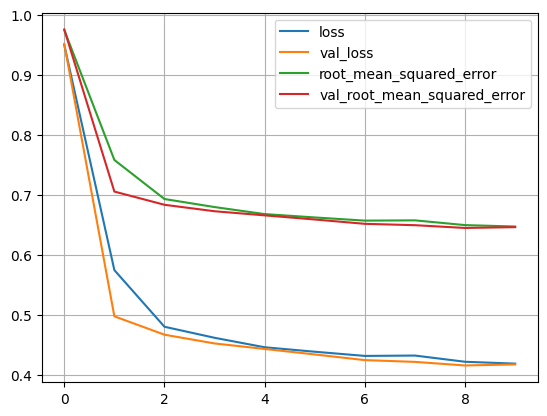

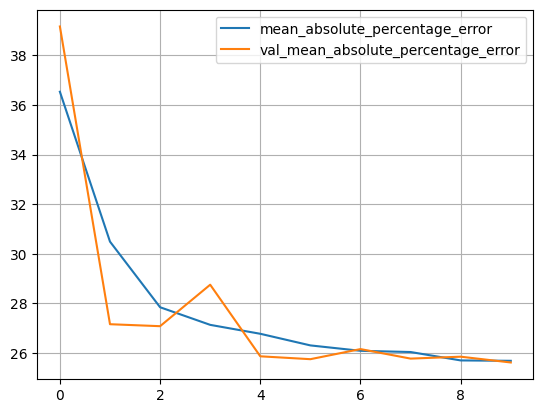

In [10]:
# Graficar el historial de entrenamiento:

dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot (grid=True)

In [11]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)

print("root_mean_squared_error train:", RMSE)

print("mean_absolute_percentage_error train:", MAPE)
# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validacion")
print("loss valid:", loss)
print("root_mean_squared error valid:", RMSE)

print("mean_absolute_percentage_error valid:", MAPE)
# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)

print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)

363/363 [==============================] - 1s 2ms/step - loss: 0.4160 - root_mean_squared_error: 0.6450 - mean_absolute_percentage_error: 25.1540
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.4160080552101135
root_mean_squared_error train: 0.6449868679046631
mean_absolute_percentage_error train: 25.15399169921875
121/121 [==============================] - 0s 2ms/step - loss: 0.4175 - root_mean_squared_error: 0.6461 - mean_absolute_percentage_error: 25.6203
Evaluar el modelo en el conjunto de validacion
loss valid: 0.41746053099632263
root_mean_squared error valid: 0.6461118459701538
mean_absolute_percentage_error valid: 25.62032127380371
162/162 [==============================] - 0s 2ms/step - loss: 0.4120 - root_mean_squared_error: 0.6419 - mean_absolute_percentage_error: 25.8635
Evaluar el modelo en el conjunto de prueba
loss test: 0.41204163432121277
root_mean_squared_error test: 0.6419047117233276
mean_absolute_percentage_error test: 25.863496780395508
